In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv(r"C:\Users\user\Downloads\AmesHousing.csv")

In [ ]:
data

In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
data.isnull().sum() #missing values

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Identify ordinal columns (example set)
ordinal_cols = ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 
                'Heating QC', 'Kitchen Qual', 'Fireplace Qu', 'Garage Qual', 
                'Garage Cond', 'Pool QC']

le = LabelEncoder()
for col in ordinal_cols:
    if col in data.columns:
        data[col] = le.fit_transform(data[col])

In [ ]:
data= pd.get_dummies(data, drop_first=True) 

In [ ]:
# Check shape and sample
print(df.shape)
print(df.head())

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Drop target variable before scaling
target = 'SalePrice'
X = data.drop(target, axis=1)
y = data[target]

In [ ]:
# Identify numerical columns only (after encoding)
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
# Standardize
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [ ]:
# Combine scaled features and target
data_scaled = pd.concat([X, y], axis=1)

In [ ]:
# Save or preview
data_scaled.to_csv("final_cleaned_scaled_data.csv", index=False)
print(data_scaled.head())

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
# Select only numerical columns for scaling
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Apply Min-Max Scaling
scaler = MinMaxScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Combine scaled features with target variable
data_scaled = pd.concat([X, y], axis=1)

# Preview the result
print(data_scaled.head())

# Optionally save it
data_scaled.to_csv("final_scaled_data.csv", index=False)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Select numerical columns only
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [ ]:
# Plot histograms
data[num_cols].hist(bins=30, figsize=(40, 35), color='blue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=40)
plt.tight_layout()
plt.show()

In [ ]:
# Plot box plots
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols[:12], 1):  # Limiting to 12 for clarity, you can increase it
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(col)
plt.tight_layout()
plt.suptitle("Box Plots of Selected Features", y=1.02, fontsize=20)
plt.show()

In [ ]:
# Features to plot against SalePrice
features = ['MS SubClass', 'Lot Frontage']

# Create scatter plots
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(data=df, x=feature, y='SalePrice', color='teal', alpha=0.6)
    plt.title(f'SalePrice vs {feature}', fontsize=14)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.suptitle("Scatter Plots: SalePrice vs Key Features", fontsize=18, y=1.02)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
# Compute correlation matrix
corr_matrix = data.corr()

# Set figure size
plt.figure(figsize=(16, 12))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Title
plt.title("Correlation Heatmap of Features", fontsize=18)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_7480\4129535569.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette="viridis")


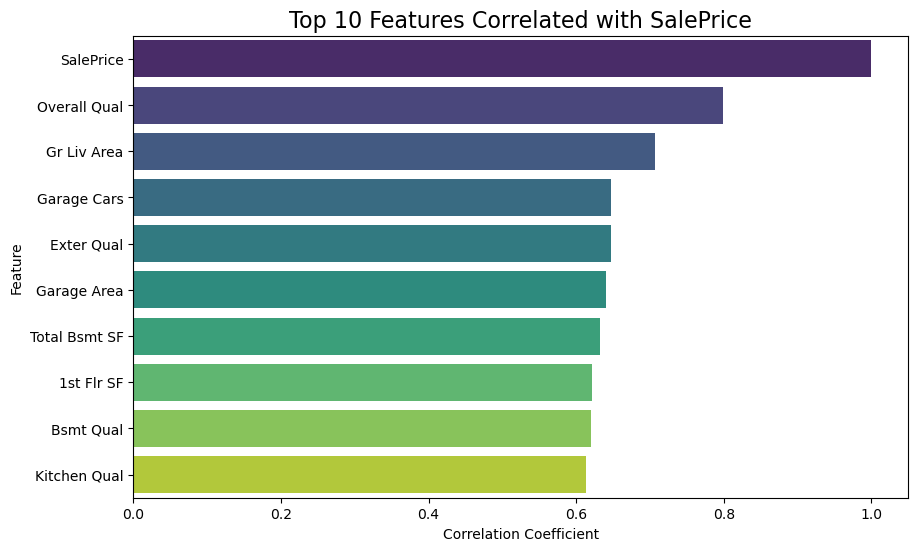

In [146]:
# Top correlations with SalePrice
top_corr = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(10)

# Display as bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette="viridis")
plt.title("Top 10 Features Correlated with SalePrice", fontsize=16)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.show()


In [149]:
# Separate features (X) and target (y)
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Split into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Print the shape of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

NameError: name 'train_test_split' is not defined

In [ ]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print("Multiple Linear Regression Results:")
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

In [152]:
# Separate features and target
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='mediumseagreen', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted SalePrice")
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'train_test_split' is not defined